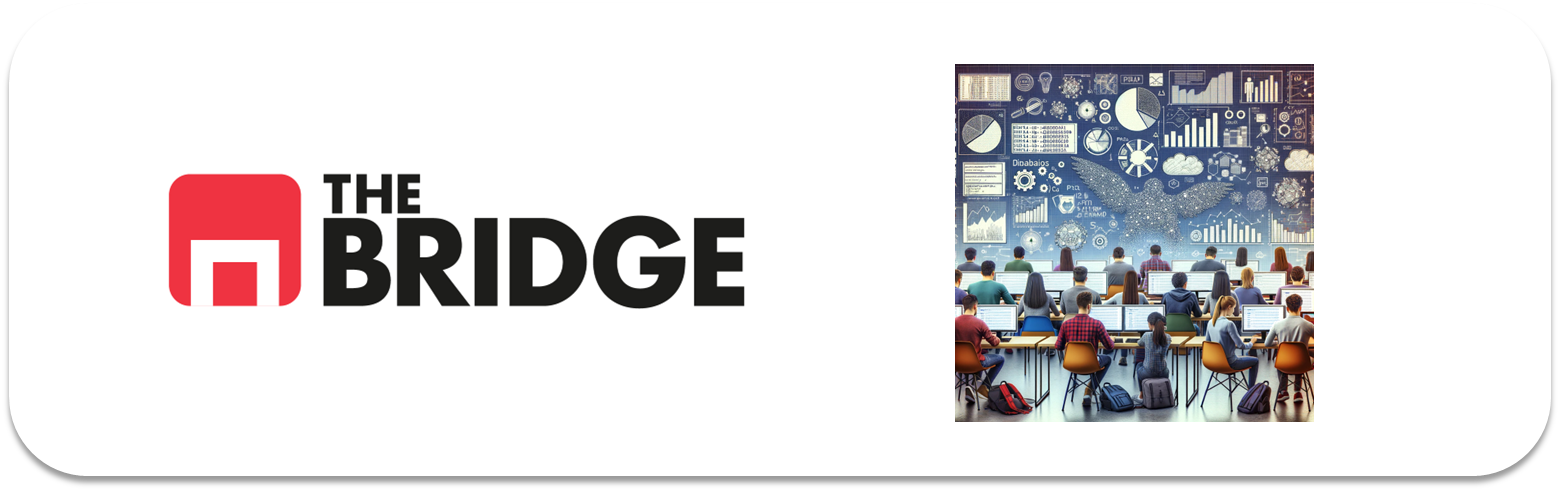

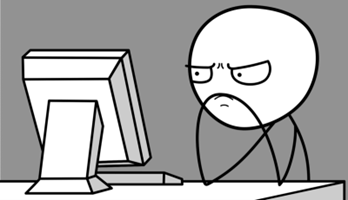

Para ejercitarte y afianzar lo aprendido sobre **Regularización**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [23]:
import numpy as np
import pandas as pd
from sklearn import metrics, model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, ElasticNet, LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns

En estos ejercicios vamos a repasar la regularización sobre regresión lineal obteniendo primero un modelo de regresión lineal para predecir el precio de un coche y luego los equivalentes con penalizaciones L2 (Ridge), L1 (Lasso) y con la combinación de ambas (ElasticNet)

### Ejercicio 1

Carga el dataset de partida ("./data/CarPrice_Assignment.csv") en el que tenemos diferentes modelos de coches con sus características y el precio de estos. Échale un vistazo

In [8]:
df_car = pd.read_csv("./data/CarPrice_Assignment.csv")

In [9]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Ejercicio 2

Identifica la variable target y asignala a una variable de nombre `target`, luego elimina de forma permanente el campo "car_ID"

In [11]:
target = "price"
df_car.drop(columns="car_ID", inplace = True)

In [12]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

### Ejercicio 3

Haz un split del dataset en train y test al 80/20 empleando la función de sklearn que ya conoces

In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df_car, test_size=0.2, random_state=42)


### Ejercicio 4

Aunque vamos a emplear todas las variabes numéricas del dataset como predictores o features, obten la correlación de todas ellas con el target y escoge los que creas que son tus tres mejores predictores. Crea una lista con los nombres de las variables numéricas y llámalo `features_num`

In [14]:
train_set.corr(numeric_only= True)[target]

symboling          -0.005183
wheelbase           0.506118
carlength           0.652071
carwidth            0.744310
carheight           0.044458
curbweight          0.824212
enginesize          0.866433
boreratio           0.546099
stroke              0.023941
compressionratio    0.035218
horsepower          0.810986
peakrpm            -0.070017
citympg            -0.711245
highwaympg         -0.713503
price               1.000000
Name: price, dtype: float64

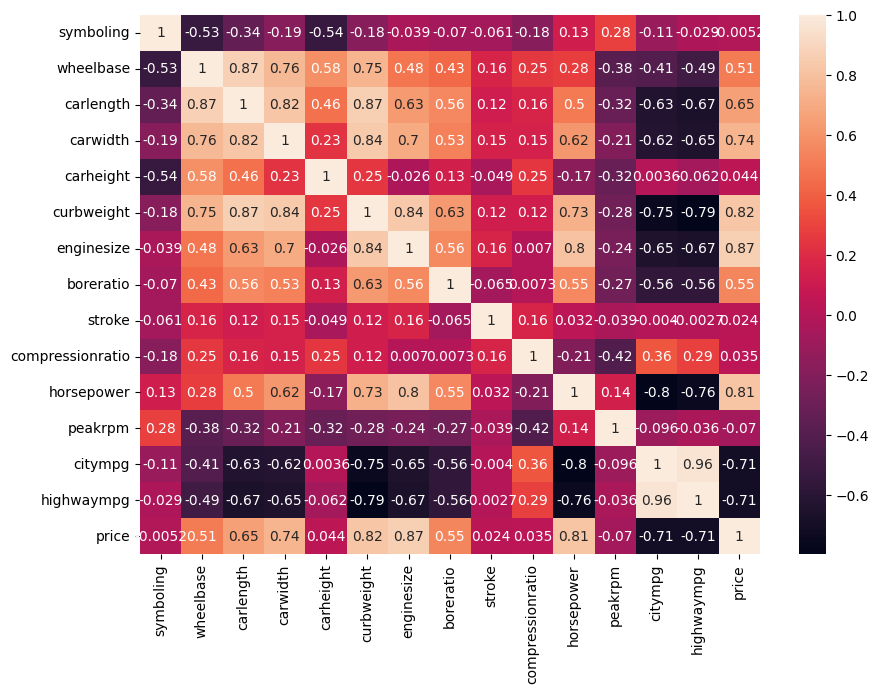

In [15]:
plt.figure(figsize = (10,7))
sns.heatmap(train_set.corr(numeric_only = True),annot=True);
plt.show();

In [16]:
#Escojo las tres con mayor correlación, aunque tienen mucha correlación entre ellas, podría ser mejor elegir otras con menos colinealidad
mejores_pred = ["curbweight", "enginesize", "horsepower"]

In [29]:
features_num = list(train_set.select_dtypes(exclude = object).columns)
features_num.remove(target)
features_num

['symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

### Ejercicio 5

Completa el siguiente código que tiene como objetivo generar un modelo de regresión lineal utilizando todos los valores de las variables (salvo la target):

In [30]:
# Separación x e y
X_train = train_set.drop(columns= [target])
y_train = train_set[target]

X_test = test_set.drop(columns = [target])
y_test = test_set[target]

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train[features_num]), columns= features_num)
X_test = pd.DataFrame(scaler.transform(X_test[features_num]), columns= features_num)

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)




LinearRegression()

### Ejercicio 6

Obten el MAE,RMSE y $R^2$ para las predicciones sobre train (X_train) y para las predicciones sobre test (X_test). ¿Podemos esperar una buena generalización?

In [34]:
y_pred_test = lin_reg.predict(X_test)
y_pred_train= lin_reg.predict(X_train)

print("Train MSE:", metrics.mean_squared_error(y_train, y_pred_train))
print("Test MSE:", metrics.mean_squared_error(y_test, y_pred_test))

print('Train RMSE:', metrics.mean_squared_error(y_train, y_pred_train, squared= False))
print('Test RMSE:', metrics.mean_squared_error(y_test, y_pred_test, squared= False))

print('Train MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Test MAE:', metrics.mean_absolute_error(y_test, y_pred_test))

print('Train MAPE:', metrics.mean_absolute_percentage_error(y_train, y_pred_train))
print('Test MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred_test))

print('Train R2:', metrics.r2_score(y_train, y_pred_train))
print('Test R2:', metrics.r2_score(y_test, y_pred_test))

Train MSE: 8477376.468057917
Test MSE: 14358029.116948422
Train RMSE: 2911.593458582073
Test RMSE: 3789.1990073033144
Train MAE: 2186.495238619768
Test MAE: 2680.4299831594244
Train MAPE: 0.16914187169594525
Test MAPE: 0.24232218332843805
Train R2: 0.8578523829898764
Test R2: 0.8181239192410048


No estamos generalizando bien, tenemos overfitting

### Ejercicio 7
 
Vamos a regularizar, crea un regresor Ridge con alpha inicial a 10 y entrenalo con el X_train. Obten MAE, RMSE y $R^2$ considerando las predicciones sobre el mismo X_train

### Ejercicio 8

Evalúalo contra el X_test y obten MAE,RMSE y $R^2$. ¿Es mejor generalizado que la regresión lineal sin regularizar?

### Ejercicio 9
 
Ahora crea un regresor Lasso con alpha inicial a 125 y entrenalo con el X_train. Obten MAE, RMSE y $R^2$ considerando las predicciones sobre el mismo X_train.

### Ejercicio 10

Evalúalo contra el X_test y obten MAE,RMSE y $R^2$. ¿Es mejor generalizado que los otros dos modelos?

### Ejercicio 11

Repite los ejercicios 9 y 10 con un regresos ElasticNet con alpha 0.2 y l1_ratio a 0.7. ¿Es mejor generalizando que el resto?

### Ejercicio 12

¿Qué podrías hacer para mejorar los regresores regularizados?

### EXTRA:

Utiliza la función siguiente para pintar la importancia de los coeficientes en cada uno de los cuatro modelos y observa el efecto de las penalizaciones de cada una de las regularizaciones:

In [ ]:
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_, index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef